In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
data=pd.read_csv("bmi_dataset.csv")

In [75]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [76]:
#change gender into 0 and 1
from sklearn.preprocessing import LabelEncoder
gender=LabelEncoder()
data['Gender']=gender.fit_transform(data['Gender'])

In [77]:
#change index to weak, fit, obese
a=(-1,0,1,2,3,4,5)
health=['Extremely Underweight','Underweight','Fit','Overweight','Obesity','Extreme Obesity']
data['Index']=pd.cut(data['Index'],bins=a, labels=health)

In [78]:
data.head()

,Gender,Height,Weight,Index
0,1,174,96,Obesity
1,1,189,87,Fit
2,0,185,110,Obesity
3,0,195,104,Overweight
4,1,149,61,Overweight


In [79]:
x=data.iloc[:, :-1].values
y=data.iloc[:, -1].values

In [80]:
#split data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [81]:
#Standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [82]:
#KNeighborsClassification
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [83]:
y_pred=classifier.predict(x_test)

In [85]:
from sklearn.metrics import accuracy_score,confusion_matrix
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)
acc=accuracy_score(y_test,y_pred)
print(acc)

[[35  0  0  1  0  0]
 [ 0  1  0  0  0  2]
 [ 0  0  9  0  1  0]
 [ 3  0  0 29  0  0]
 [ 0  0  2  2 11  0]
 [ 0  1  1  0  0  2]]
0.87


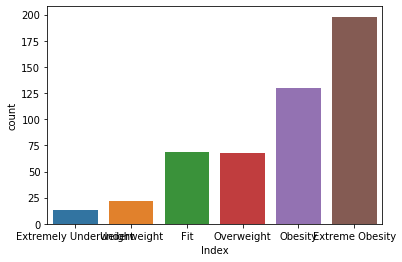

In [97]:
sns.countplot(data['Index'])

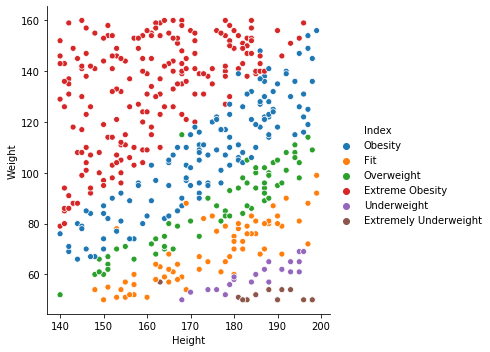

In [104]:
sns.relplot(hue='Index',y='Weight',x='Height',data=data)

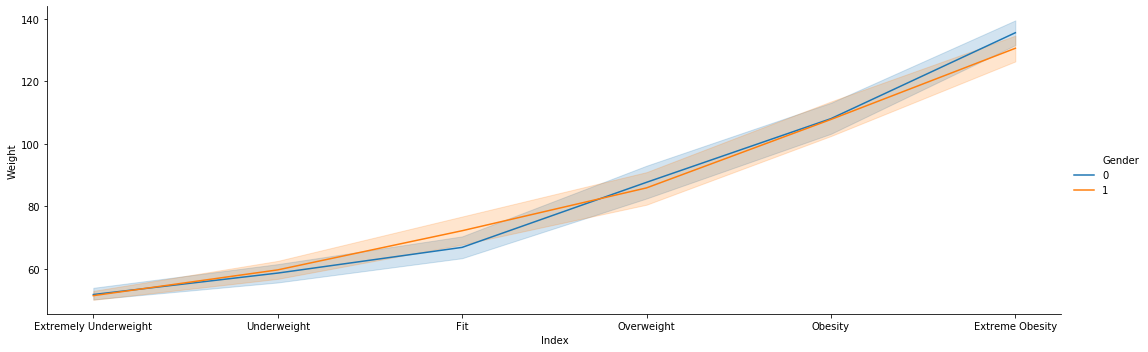

In [112]:
sns.relplot(y='Weight',x='Index',kind='line',hue='Gender',data=data,aspect=3)

In [95]:
print(classifier.predict(sc.transform([['1','173','131']])))

['Extreme Obesity']
